About this file
Title: Haberman's Survival Data

Sources:
(a) Donor: Tjen-Sien Lim (limt@stat.wisc.edu)
(b) Date: March 4, 1999

Past Usage:

Haberman, S. J. (1976). Generalized Residuals for Log-Linear
Models, Proceedings of the 9th International Biometrics
Conference, Boston, pp. 104-122.
Landwehr, J. M., Pregibon, D., and Shoemaker, A. C. (1984),
Graphical Models for Assessing Logistic Regression Models (with
discussion), Journal of the American Statistical Association 79:
61-83.
Lo, W.-D. (1993). Logistic Regression Trees, PhD thesis,
Department of Statistics, University of Wisconsin, Madison, WI.
Relevant Information:
The dataset contains cases from a study that was conducted between
1958 and 1970 at the University of Chicago's Billings Hospital on
the survival of patients who had undergone surgery for breast
cancer.

Number of Instances: 306

Number of Attributes: 4 (including the class attribute)

Attribute Information:

Age of patient at time of operation (numerical)
Patient's year of operation (year - 1900, numerical)
Number of positive axillary nodes detected (numerical)
Survival status (class attribute)
1 = the patient survived 5 years or longer
2 = the patient died within 5 year
Missing Attribute Values: None

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [8]:
df=pd.read_csv('haberman.csv',names=['Age','Op_Year','axil_nodes','survival_status_after_5_years'],header=None)
df.shape

(306, 4)

In [9]:
df.columns

Index(['Age', 'Op_Year', 'axil_nodes', 'survival_status_after_5_years'], dtype='object')

In [10]:
df.isnull().sum()

Age                              0
Op_Year                          0
axil_nodes                       0
survival_status_after_5_years    0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   Age                            306 non-null    int64
 1   Op_Year                        306 non-null    int64
 2   axil_nodes                     306 non-null    int64
 3   survival_status_after_5_years  306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


In [13]:
df.describe()

,Age,Op_Year,axil_nodes,survival_status_after_5_years
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [18]:
df.head()

,Age,Op_Year,axil_nodes,survival_status_after_5_years
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


There are no missing values in this dataset. So there is no need to do data imputation.
The datatype of 'survival_status_after_5_years' column is integer. It has to be converted to categorical datatype.
The values of 'survival_status_after_5_years' column are not meanigful. Hence they are mapped to 'yes' (survived after 5 years) and 'no' (not survived after 5 years)

In [21]:
df['survival_status_after_5_years']=df['survival_status_after_5_years'].map({1:'Yes',2:'No'})

In [25]:
df['survival_status_after_5_years']=df['survival_status_after_5_years'].astype('category')

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   Age                            306 non-null    int64   
 1   Op_Year                        306 non-null    int64   
 2   axil_nodes                     306 non-null    int64   
 3   survival_status_after_5_years  306 non-null    category
dtypes: category(1), int64(3)
memory usage: 7.7 KB


Target variable distribution

In [33]:
df['survival_status_after_5_years'].value_counts()

Yes    225
No      81
Name: survival_status_after_5_years, dtype: int64

In [29]:
df['survival_status_after_5_years'].value_counts(normalize=True)

Yes    0.735294
No     0.264706
Name: survival_status_after_5_years, dtype: float64

### Univariate Analysis

In [34]:
df.head(2)

,Age,Op_Year,axil_nodes,survival_status_after_5_years
0,30,64,1,Yes
1,30,62,3,Yes


<AxesSubplot:xlabel='Age', ylabel='Count'>

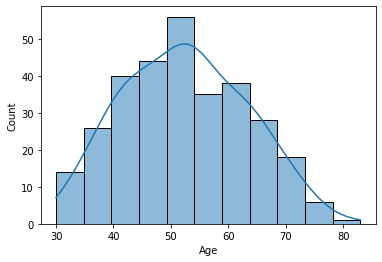

In [38]:
sns.histplot(df,x='Age',kde=True)

<AxesSubplot:xlabel='Age', ylabel='Count'>

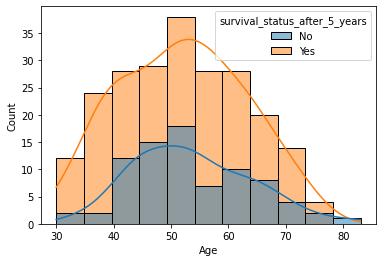

In [45]:
sns.histplot(df,x='Age',hue='survival_status_after_5_years',kde='True')

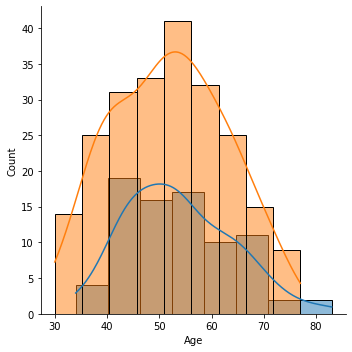

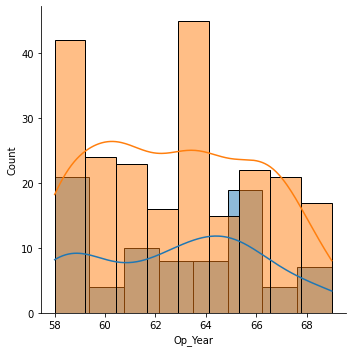

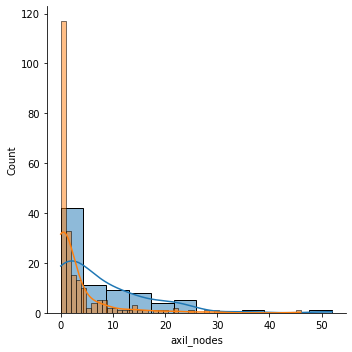

In [56]:
for col in df.columns:
    if col!='survival_status_after_5_years':
        g=sns.FacetGrid(df,hue='survival_status_after_5_years', height=5)
        g.map(sns.histplot, col ,kde='True')

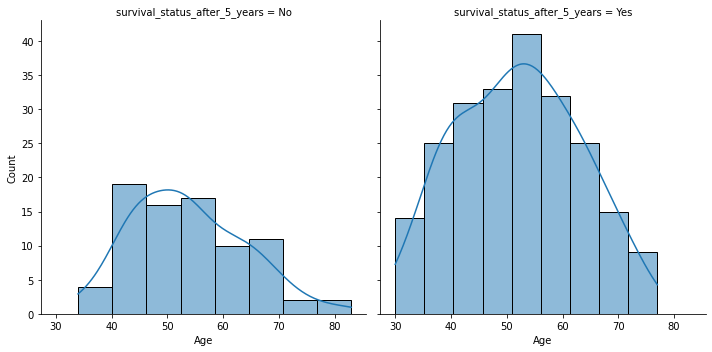

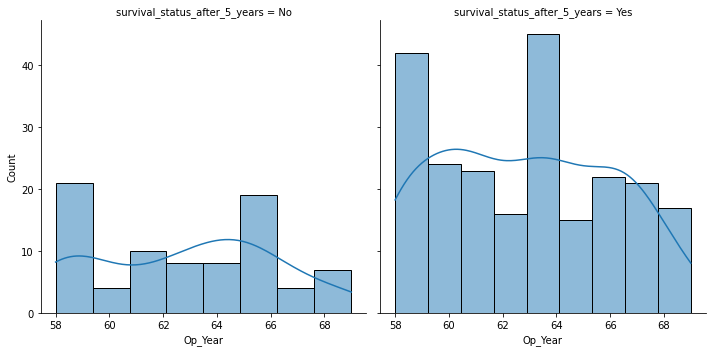

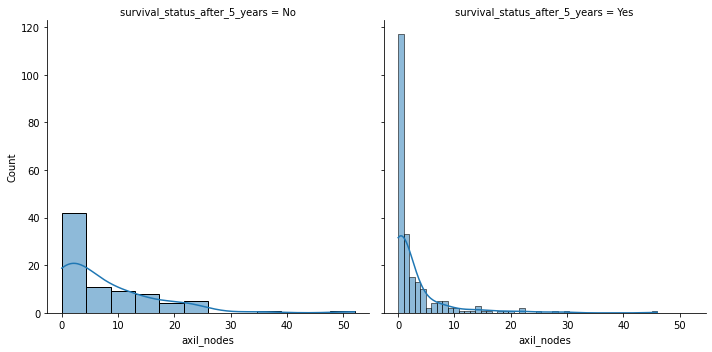

In [57]:
for col in df.columns:
    if col!='survival_status_after_5_years':
        g=sns.FacetGrid(df,col='survival_status_after_5_years', height=5)
        g.map(sns.histplot, col ,kde='True')

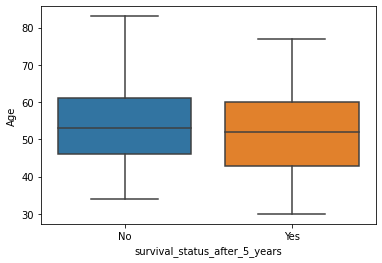

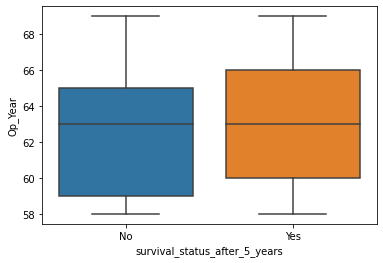

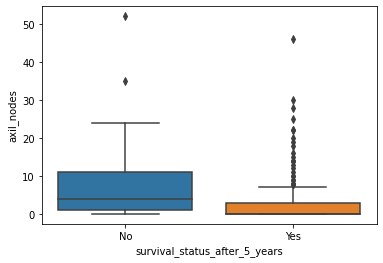

In [87]:
for col in df.columns:
    if col!='survival_status_after_5_years':
        sns.boxplot(data=df,x='survival_status_after_5_years',y=col)
        plt.show()

In [105]:
col='Age' 
px.box(df,'survival_status_after_5_years',col,color='survival_status_after_5_years')

In [100]:
col='Op_Year'
px.box(df,'survival_status_after_5_years',col,color='survival_status_after_5_years')

In [101]:
col='axil_nodes'  
px.box(df,'survival_status_after_5_years',col,color='survival_status_after_5_years')

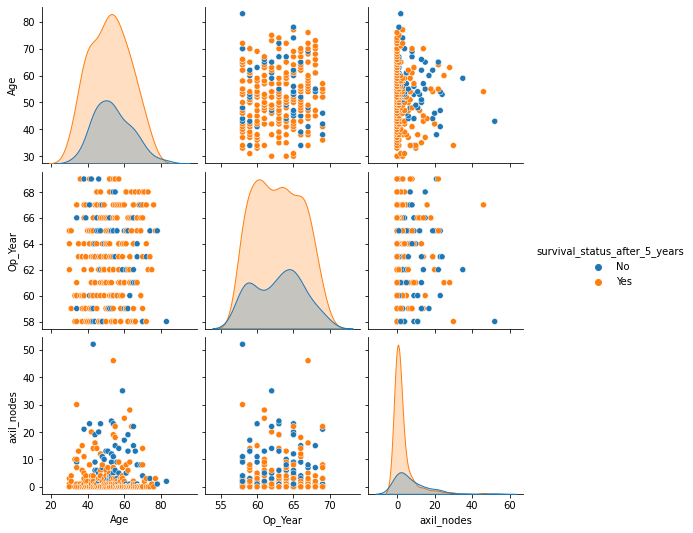

In [106]:
sns.pairplot(df, hue='survival_status_after_5_years')

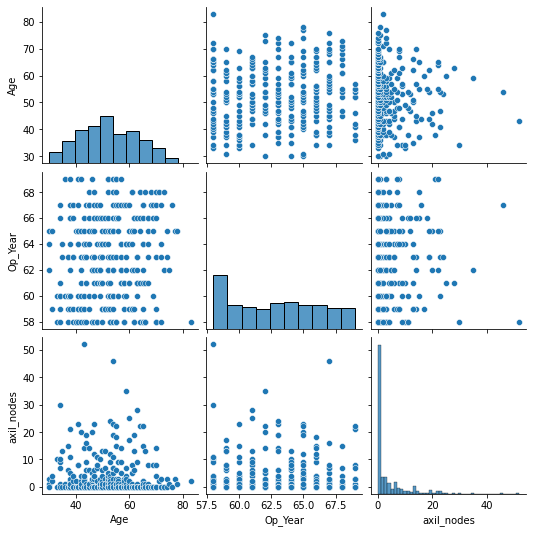

In [107]:
sns.pairplot(df)